# Portfolio exercise - Spatial Stuff

Exercise for spatial stuff
So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

OPEN_DATA_STOEJDATA_VIEWPoint.shp
This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.


In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

     |████████████████████████████████| 972kB 5.8MB/s 
     |████████████████████████████████| 14.8MB 306kB/s 
     |████████████████████████████████| 6.5MB 23.3MB/s 
     |████████████████████████████████| 18.3MB 265kB/s 
     |████████████████████████████████| 1.6MB 4.3MB/s 


In [ ]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

--2020-11-25 14:28:54--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip [following]
--2020-11-25 14:28:54--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951658 (929K) [application/zip]
Saving to: ‘shapefiles_exercise.zip’

shapefiles_exercise 100%[===================>] 929.35K  --.-KB/s    in 0.1s    

2020

In [ ]:
!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data files

--2020-11-25 14:36:57--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip [following]
--2020-11-25 14:36:57--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32728265 (31M) [application/zip]
Saving to: ‘shapefiles.zip’

shapefiles.zip      100%[===================>]  31.21M  56.9MB/s    in 0.5s    

2020-11-25 14:36:58 (56.9 MB/s) - ‘shap

In [ ]:
# Loading required packages

import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# Load the data

stoejdata = gdp.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")

In [ ]:
# Your solutions from here...
stoejdata.head()

,DATAEJER,VEJBESTYRE,VEJNR,VEJDEL,VEJNAVN,KILOMETER,METER,LOKATION,KOMMUNE,AAR,AADT,TIMEANTAL0,TIMEANTAL1,TIMEANTAL2,GNSHAST07_,GNSHAST19_,GNSHAST22_,TIMEANTAL3,TIMEANTAL4,TIMEANTAL5,GNSHAST070,GNSHAST190,GNSHAST220,TIMEANTAL6,TIMEANTAL7,TIMEANTAL8,GNSHAST071,GNSHAST191,GNSHAST221,TIMEANTAL9,TIMEANTA10,TIMEANTA11,GNSHAST072,GNSHAST192,GNSHAST222,geometry
0,316,316.0,3161633.0,0,"Søstrupvej, 4300 Holbæk",1.0,830.0,Søstrupvej ca. 170 m fra nr. 19,316.0,2019.0,2720.0,192.0,79.0,19.0,59.9,61.6,62.0,187.0,79.0,19.0,60.3,61.8,62.6,4.0,1.0,0.0,54.5,54.9,53.8,NaN,NaN,NaN,50.0,NaN,50.7,POINT (666785.000 6174847.000)
1,316,316.0,300602.0,0,Slagelse-Snertinge,26.0,640.0,Ved Bromøllekro,316.0,2019.0,4765.0,300.0,129.0,87.0,58.3,60.3,62.5,282.0,125.0,82.0,58.4,60.4,62.6,10.0,4.0,3.0,56.3,57.7,60.7,7.0,2.0,3.0,57.0,55.5,61.0,POINT (650362.000 6165481.000)
2,316,316.0,300143.0,0,Elverdam-Ugerløse,7.0,420.0,Øst for 187,316.0,2019.0,2605.0,169.0,85.0,36.0,42.0,42.1,44.5,160.0,83.0,34.0,42.4,42.4,45.0,6.0,2.0,1.0,38.6,37.7,40.8,2.0,1.0,1.0,38.7,39.0,39.6,POINT (670888.000 6165624.000)
3,316,316.0,300143.0,0,Elverdam-Ugerløse,1.0,656.0,Udfor P-Lomme,316.0,2019.0,3012.0,194.0,100.0,43.0,77.4,78.4,80.9,189.0,100.0,42.0,77.8,78.6,81.1,3.0,1.0,1.0,71.4,73.9,78.2,1.0,0.0,0.0,66.2,77.4,74.1,POINT (675622.000 6167385.000)
4,316,316.0,300143.0,0,Elverdam-Ugerløse,11.0,100.0,Øst for 346,316.0,2019.0,2087.0,134.0,68.0,30.0,63.7,65.8,68.0,127.0,67.0,28.0,64.2,66.4,69.0,4.0,1.0,1.0,59.3,60.1,60.0,2.0,2.0,1.0,57.4,55.4,58.7,POINT (668085.000 6163679.000)


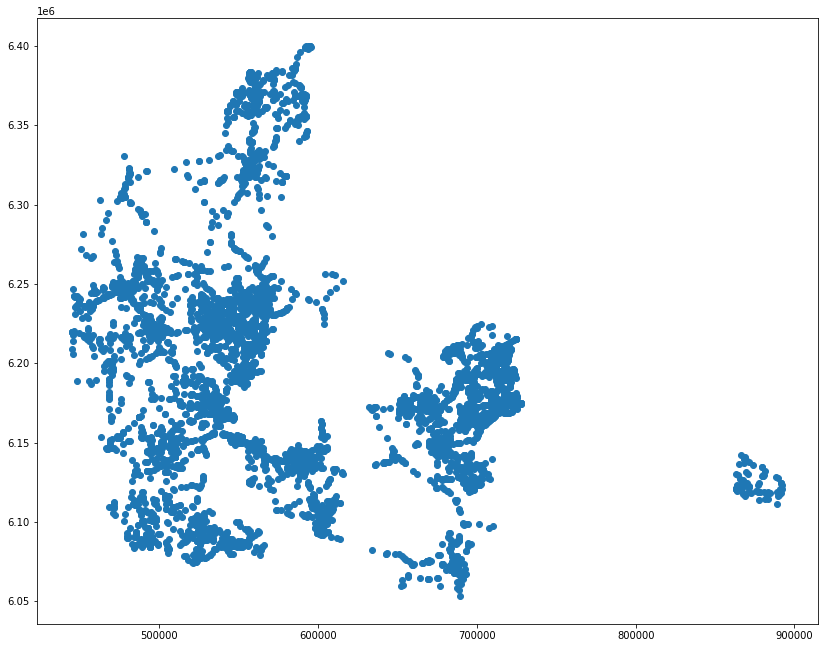

In [ ]:
stoejdata.plot(figsize=(14, 14))

In [ ]:
mun = gdp.read_file("KOMMUNE.shp")

In [ ]:
mun.head()

,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,KOMNAVN,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,geometry
0,149673,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((675926.480 6172129.210 -999.000, 6..."
1,149674,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((687523.890 6176458.950 -999.000, 6..."
2,149675,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((689361.510 6173523.720 -999.000, 6..."
3,149676,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((689210.210 6174589.210 -999.000, 6..."
4,149647,6310,Kommune,vedtaget,endelig,389130,25096.56,1084,Region Hovedstaden,2018-01-22,None,0250,Frederikssund,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-01-22,2018-01-22,None,2020-11-07,"POLYGON Z ((679613.660 6187623.990 -999.000, 6..."


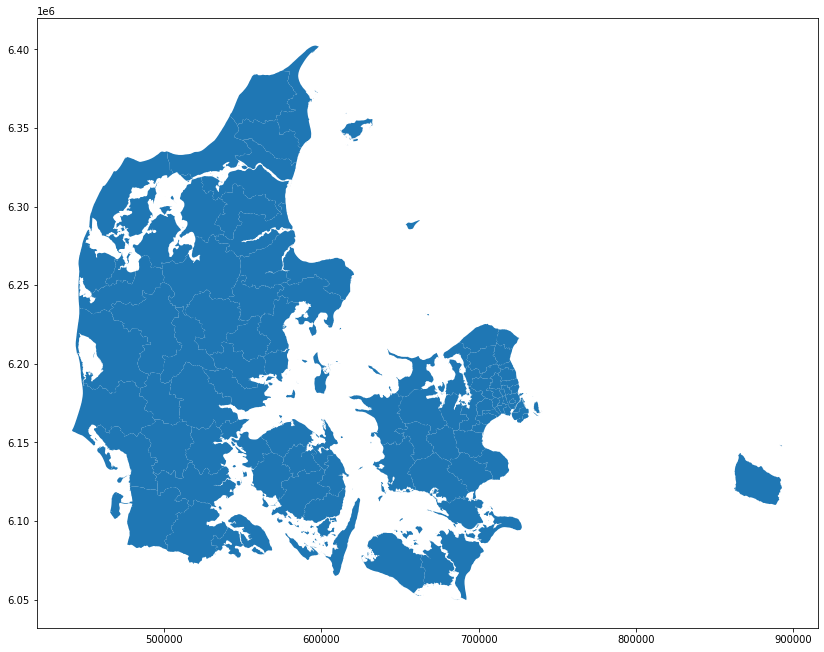

In [ ]:
mun.plot(figsize=(14, 14))

In [ ]:
stoejdata.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 83.92)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
mun.crs


<Projected CRS: PROJCS["UTM32_EUREF89",GEOGCS["GCS_EUREF89",DATUM[ ...>
Name: UTM32_EUREF89
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: EUREF89
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

In [ ]:
mun = mun.to_crs(epsg=3857)
stoejdata = stoejdata.to_crs(epsg=3857)

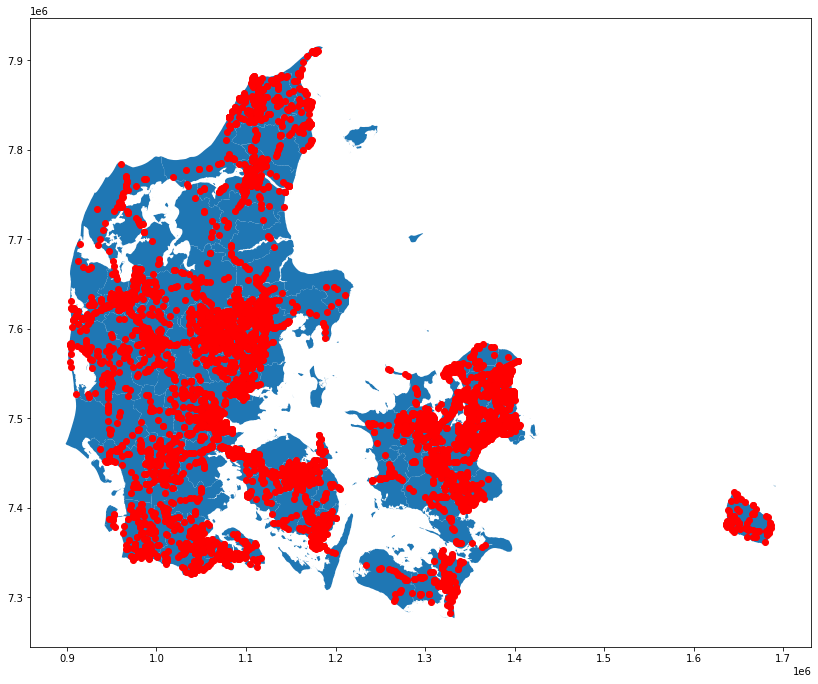

In [ ]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
mun.plot(ax=ax)
stoejdata.plot(ax=ax, color="red")

In [ ]:
stoejdata_in_mun = gdp.sjoin(stoejdata, mun, how="left", op='within')

In [ ]:
stoejdata_in_mun.head()

,DATAEJER,VEJBESTYRE,VEJNR,VEJDEL,VEJNAVN,KILOMETER,METER,LOKATION,KOMMUNE,AAR,AADT,TIMEANTAL0,TIMEANTAL1,TIMEANTAL2,GNSHAST07_,GNSHAST19_,GNSHAST22_,TIMEANTAL3,TIMEANTAL4,TIMEANTAL5,GNSHAST070,GNSHAST190,GNSHAST220,TIMEANTAL6,TIMEANTAL7,TIMEANTAL8,GNSHAST071,GNSHAST191,GNSHAST221,TIMEANTAL9,TIMEANTA10,TIMEANTA11,GNSHAST072,GNSHAST192,GNSHAST222,geometry,index_right,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,KOMNAVN,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP
0,316,316.0,3161633.0,0,"Søstrupvej, 4300 Holbæk",1.0,830.0,Søstrupvej ca. 170 m fra nr. 19,316.0,2019.0,2720.0,192.0,79.0,19.0,59.9,61.6,62.0,187.0,79.0,19.0,60.3,61.8,62.6,4.0,1.0,0.0,54.5,54.9,53.8,NaN,NaN,NaN,50.0,NaN,50.7,POINT (1297251.865 7497087.290),160.0,149608.0,6310.0,Kommune,vedtaget,endelig,389140.0,57922.32,1085,Region Sjælland,2019-01-01,None,0316,Holbæk,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07
1,316,316.0,300602.0,0,Slagelse-Snertinge,26.0,640.0,Ved Bromøllekro,316.0,2019.0,4765.0,300.0,129.0,87.0,58.3,60.3,62.5,282.0,125.0,82.0,58.4,60.4,62.6,10.0,4.0,3.0,56.3,57.7,60.7,7.0,2.0,3.0,57.0,55.5,61.0,POINT (1267626.247 7481556.424),160.0,149608.0,6310.0,Kommune,vedtaget,endelig,389140.0,57922.32,1085,Region Sjælland,2019-01-01,None,0316,Holbæk,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07
2,316,316.0,300143.0,0,Elverdam-Ugerløse,7.0,420.0,Øst for 187,316.0,2019.0,2605.0,169.0,85.0,36.0,42.0,42.1,44.5,160.0,83.0,34.0,42.4,42.4,45.0,6.0,2.0,1.0,38.6,37.7,40.8,2.0,1.0,1.0,38.7,39.0,39.6,POINT (1303871.063 7480474.820),160.0,149608.0,6310.0,Kommune,vedtaget,endelig,389140.0,57922.32,1085,Region Sjælland,2019-01-01,None,0316,Holbæk,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07
3,316,316.0,300143.0,0,Elverdam-Ugerløse,1.0,656.0,Udfor P-Lomme,316.0,2019.0,3012.0,194.0,100.0,43.0,77.4,78.4,80.9,189.0,100.0,42.0,77.8,78.6,81.1,3.0,1.0,1.0,71.4,73.9,78.2,1.0,0.0,0.0,66.2,77.4,74.1,POINT (1312351.046 7483258.032),160.0,149608.0,6310.0,Kommune,vedtaget,endelig,389140.0,57922.32,1085,Region Sjælland,2019-01-01,None,0316,Holbæk,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07
4,316,316.0,300143.0,0,Elverdam-Ugerløse,11.0,100.0,Øst for 346,316.0,2019.0,2087.0,134.0,68.0,30.0,63.7,65.8,68.0,127.0,67.0,28.0,64.2,66.4,69.0,4.0,1.0,1.0,59.3,60.1,60.0,2.0,2.0,1.0,57.4,55.4,58.7,POINT (1298791.672 7477227.346),160.0,149608.0,6310.0,Kommune,vedtaget,endelig,389140.0,57922.32,1085,Region Sjælland,2019-01-01,None,0316,Holbæk,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07


In [ ]:
stoejdata_in_mun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7751 entries, 0 to 7750
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   DATAEJER     7751 non-null   object  
 1   VEJBESTYRE   7751 non-null   float64 
 2   VEJNR        7751 non-null   float64 
 3   VEJDEL       7751 non-null   object  
 4   VEJNAVN      7749 non-null   object  
 5   KILOMETER    7751 non-null   float64 
 6   METER        7751 non-null   float64 
 7   LOKATION     7748 non-null   object  
 8   KOMMUNE      7751 non-null   float64 
 9   AAR          7751 non-null   float64 
 10  AADT         7751 non-null   float64 
 11  TIMEANTAL0   7727 non-null   float64 
 12  TIMEANTAL1   7727 non-null   float64 
 13  TIMEANTAL2   7727 non-null   float64 
 14  GNSHAST07_   7700 non-null   float64 
 15  GNSHAST19_   7699 non-null   float64 
 16  GNSHAST22_   7699 non-null   float64 
 17  TIMEANTAL3   7673 non-null   float64 
 18  TIMEANTAL4   7673 no

In [ ]:
mun ['KOMKODE'] = mun['KOMKODE'].astype('float')

In [ ]:
stoejdata_select = stoejdata.loc[:, ['KOMMUNE', 'GNSHAST071']]
stoejdata_grouped = stoejdata_select.groupby(['KOMMUNE'])

In [ ]:
stoejdata_grouped.mean()


,GNSHAST071
KOMMUNE,
0.0,72.907692
101.0,31.097826
147.0,30.845000
151.0,72.583333
153.0,92.830769
...,...
846.0,108.113333
849.0,67.772727
851.0,51.842678


In [ ]:
stoejdata_grouped = stoejdata_grouped.mean().reset_index()
stoejdata_grouped.head()

,KOMMUNE,GNSHAST071
0,0.0,72.907692
1,101.0,31.097826
2,147.0,30.845000
3,151.0,72.583333
4,153.0,92.830769


In [ ]:
mun = mun.dissolve(by='KOMNAVN')

In [ ]:
stoejdata.head()

,DATAEJER,VEJBESTYRE,VEJNR,VEJDEL,VEJNAVN,KILOMETER,METER,LOKATION,KOMMUNE,AAR,AADT,TIMEANTAL0,TIMEANTAL1,TIMEANTAL2,GNSHAST07_,GNSHAST19_,GNSHAST22_,TIMEANTAL3,TIMEANTAL4,TIMEANTAL5,GNSHAST070,GNSHAST190,GNSHAST220,TIMEANTAL6,TIMEANTAL7,TIMEANTAL8,GNSHAST071,GNSHAST191,GNSHAST221,TIMEANTAL9,TIMEANTA10,TIMEANTA11,GNSHAST072,GNSHAST192,GNSHAST222,geometry
0,316,316.0,3161633.0,0,"Søstrupvej, 4300 Holbæk",1.0,830.0,Søstrupvej ca. 170 m fra nr. 19,316.0,2019.0,2720.0,192.0,79.0,19.0,59.9,61.6,62.0,187.0,79.0,19.0,60.3,61.8,62.6,4.0,1.0,0.0,54.5,54.9,53.8,NaN,NaN,NaN,50.0,NaN,50.7,POINT (1297251.865 7497087.290)
1,316,316.0,300602.0,0,Slagelse-Snertinge,26.0,640.0,Ved Bromøllekro,316.0,2019.0,4765.0,300.0,129.0,87.0,58.3,60.3,62.5,282.0,125.0,82.0,58.4,60.4,62.6,10.0,4.0,3.0,56.3,57.7,60.7,7.0,2.0,3.0,57.0,55.5,61.0,POINT (1267626.247 7481556.424)
2,316,316.0,300143.0,0,Elverdam-Ugerløse,7.0,420.0,Øst for 187,316.0,2019.0,2605.0,169.0,85.0,36.0,42.0,42.1,44.5,160.0,83.0,34.0,42.4,42.4,45.0,6.0,2.0,1.0,38.6,37.7,40.8,2.0,1.0,1.0,38.7,39.0,39.6,POINT (1303871.063 7480474.820)
3,316,316.0,300143.0,0,Elverdam-Ugerløse,1.0,656.0,Udfor P-Lomme,316.0,2019.0,3012.0,194.0,100.0,43.0,77.4,78.4,80.9,189.0,100.0,42.0,77.8,78.6,81.1,3.0,1.0,1.0,71.4,73.9,78.2,1.0,0.0,0.0,66.2,77.4,74.1,POINT (1312351.046 7483258.032)
4,316,316.0,300143.0,0,Elverdam-Ugerløse,11.0,100.0,Øst for 346,316.0,2019.0,2087.0,134.0,68.0,30.0,63.7,65.8,68.0,127.0,67.0,28.0,64.2,66.4,69.0,4.0,1.0,1.0,59.3,60.1,60.0,2.0,2.0,1.0,57.4,55.4,58.7,POINT (1298791.672 7477227.346)


In [ ]:
data_merged = mun.merge(stoejdata_grouped, left_on='KOMKODE', right_on='KOMMUNE', how ='left', validate = 'one_to_one')


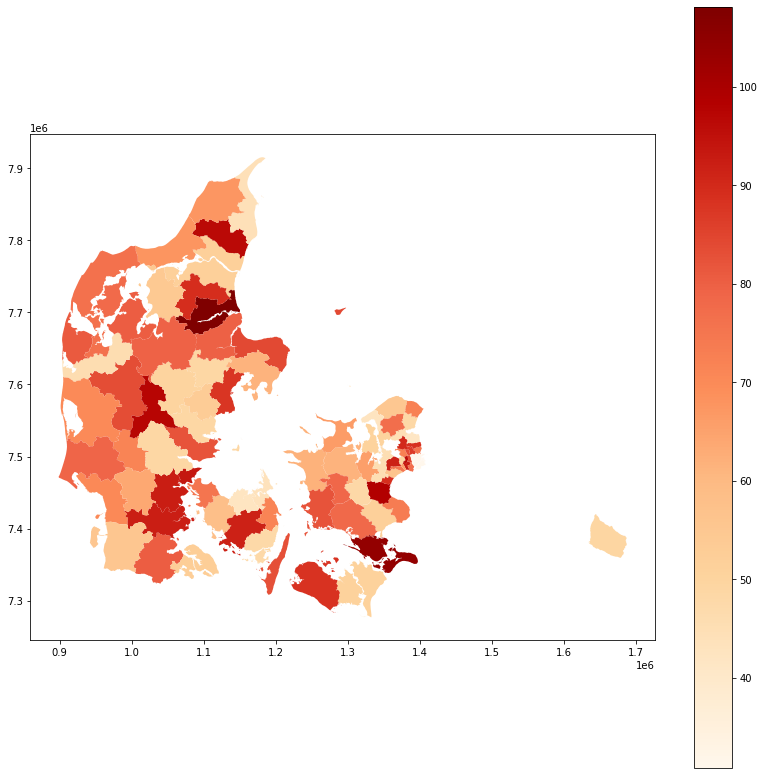

In [ ]:
data_merged.plot(column="GNSHAST071", legend="True", figsize=(14,14), cmap='OrRd')
